In [8]:
#importing required packages
#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv('Housing_dataset_train.csv')

In [10]:
test = pd.read_csv('Housing_dataset_test.csv')

In [11]:
sub = pd.read_csv('Sample_submission.csv')

In [12]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [13]:
train.shape

(14000, 7)

In [14]:
test.shape

(6000, 6)

In [15]:
sub.shape

(6000, 1)

In [16]:
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [17]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [19]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [20]:
print(train.isnull().sum())

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64


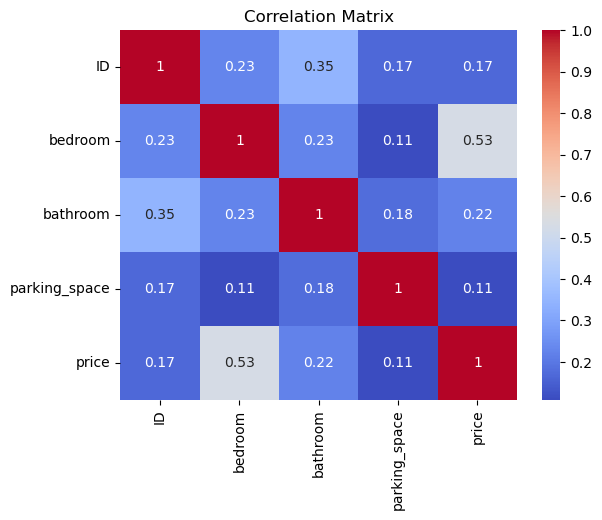

In [21]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


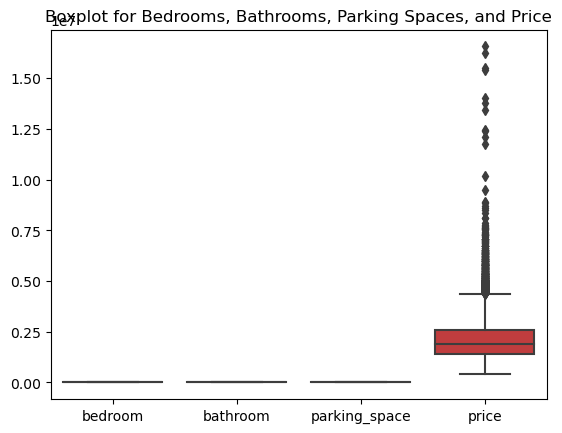

In [23]:
# Boxplot to identify outliers
sns.boxplot(data=train[['bedroom', 'bathroom', 'parking_space', 'price']])
plt.title('Boxplot for Bedrooms, Bathrooms, Parking Spaces, and Price')
plt.show()

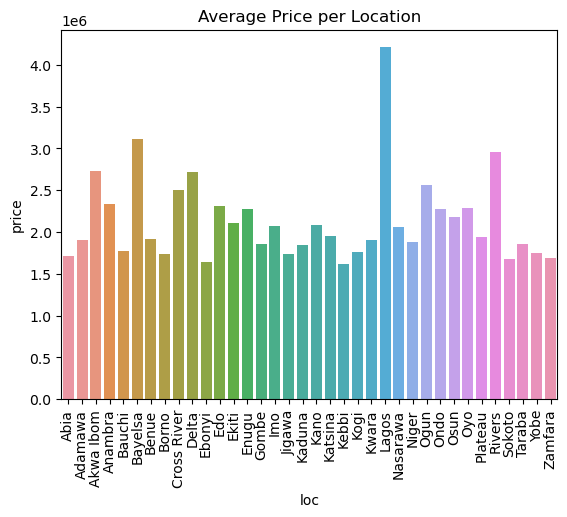

In [24]:
# Location-based analysis: Average price per location
average_price_per_location = train.groupby('loc')['price'].mean().reset_index()
sns.barplot(x='loc', y='price', data=average_price_per_location)
plt.xticks(rotation=90)
plt.title('Average Price per Location')
plt.show()

In [30]:
from collections import Counter

# Drop rows with NaN values in the 'title' column
train_cleaned = train.dropna(subset=['title'])

# Assuming the title column contains strings separated by spaces
title_words = ' '.join(train_cleaned['title']).split()
title_word_count = Counter(title_words)
top_keywords = title_word_count.most_common(10)
# Convert the top_keywords list to a DataFrame
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])
print("Top Keywords in Titles:")
top_keywords_df

Top Keywords in Titles:


,Keyword,Frequency
0,duplex,3877
1,Flat,1372
2,Apartment,1331
3,Townhouse,1327
4,Mansion,1322
5,Detached,1312
6,Penthouse,1306
7,Semi-detached,1299
8,Bungalow,1293
9,Terrace,1266


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
train.drop(columns=['ID'], inplace=True)

In [17]:
# Impute missing numerical values with the median
train['bedroom'].fillna(train['bedroom'].median(), inplace=True)
train['bathroom'].fillna(train['bathroom'].median(), inplace=True)
train['parking_space'].fillna(train['parking_space'].median(), inplace=True)

In [18]:
# Impute missing numerical values with the median
test['bedroom'].fillna(test['bedroom'].median(), inplace=True)
test['bathroom'].fillna(test['bathroom'].median(), inplace=True)
test['parking_space'].fillna(test['parking_space'].median(), inplace=True)

In [19]:
# Impute missing categorical values with the most frequent category
train['loc'].fillna(train['loc'].mode()[0], inplace=True)
train['title'].fillna(train['title'].mode()[0], inplace=True)

In [20]:
# Impute missing categorical values with the most frequent category
test['loc'].fillna(test['loc'].mode()[0], inplace=True)
test['title'].fillna(test['title'].mode()[0], inplace=True)

In [21]:
# Create a new feature 'total_rooms'
train['total_rooms'] = train['bedroom'] + train['bathroom'] + train['parking_space']
test['total_rooms'] = test['bedroom'] + test['bathroom'] + test['parking_space']

In [22]:
# Encode categorical features 'loc' and 'title'
train = pd.get_dummies(train, columns=['loc', 'title'], drop_first=True)
test = pd.get_dummies(test, columns=['loc', 'title'], drop_first=True)

In [23]:
# Separate the target variable 'price' from the features
X = train.drop(columns=['price'])
y = train['price']

In [24]:
# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features (optional, but can help some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Train a simple linear regression model (you can use other regression models too)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 391573101800.7244


In [27]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 625758.021762985


In [32]:
X.shape, test.shape

((14000, 48), (6000, 49))

In [33]:
test.drop(columns=['ID'], inplace=True)

In [35]:
y_test_pred = model.predict(test)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
y_test_pred

array([5444810.38907182, 4494452.60695437, 5262698.02684896, ...,
       5663871.22443377, 6462048.71538496, 7589808.28648462])

In [37]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'ID': sub['ID'],
    'Price': y_test_pred
})

In [38]:
submission_df.head()

,ID,Price
0,845,5.444810e+06
1,1924,4.494453e+06
2,10718,5.262698e+06
3,12076,9.899264e+06
4,12254,6.690124e+06


In [40]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission2.csv', index=False)

In [48]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Assuming you have already preprocessed your data and defined X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, loss_function='RMSE', logging_level='Silent')

# Fit the model using the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
predictions = cat_model.predict(X_test)

In [51]:
# Calculate the mean squared error
mse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 573929.2887263661


In [52]:
predictions = cat_model.predict(test)

In [54]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'ID': sub['ID'],
    'price': predictions
})

In [55]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_cat.csv', index=False)